The problem we are trying to investigate is trying to predict the number of suicides. Therefore, we chose our dataset as it provides data pertaining to suicides between 1985 to 2016. Our dataset is 0.396MB, contains 27.8k entries, and also has 12 features. 

In [50]:
# Import some common packages
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

def load_insurance_data():
    csv_path = os.path.join("pollution_us_2000_2016.csv")
    return pd.read_csv(csv_path)

pollution = load_insurance_data()
pollution.head()

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


In [51]:
pollution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746661 entries, 0 to 1746660
Data columns (total 29 columns):
Unnamed: 0           int64
State Code           int64
County Code          int64
Site Num             int64
Address              object
State                object
County               object
City                 object
Date Local           object
NO2 Units            object
NO2 Mean             float64
NO2 1st Max Value    float64
NO2 1st Max Hour     int64
NO2 AQI              int64
O3 Units             object
O3 Mean              float64
O3 1st Max Value     float64
O3 1st Max Hour      int64
O3 AQI               int64
SO2 Units            object
SO2 Mean             float64
SO2 1st Max Value    float64
SO2 1st Max Hour     int64
SO2 AQI              float64
CO Units             object
CO Mean              float64
CO 1st Max Value     float64
CO 1st Max Hour      int64
CO AQI               float64
dtypes: float64(10), int64(10), object(9)
memory usage: 386.5+ MB


In [52]:
pollution.describe()

,Unnamed: 0,State Code,County Code,Site Num,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
count,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,873754.000000,1.746661e+06,1.746661e+06,1.746661e+06,873338.000000
mean,5.471414e+04,2.230907e+01,7.169381e+01,1.118214e+03,1.282193e+01,2.541485e+01,1.173102e+01,2.389822e+01,2.612485e-02,3.920331e-02,1.017053e+01,3.605012e+01,1.870364e+00,4.492185e+00,9.664906e+00,7.115945,3.682177e-01,6.201067e-01,7.875026e+00,5.996595
std,3.372908e+04,1.725621e+01,7.948023e+01,2.003103e+03,9.504814e+00,1.599963e+01,7.877501e+00,1.516280e+01,1.136974e-02,1.534362e-02,4.003144e+00,1.978042e+01,2.760435e+00,7.679866e+00,6.731228e+00,11.937473,3.140231e-01,6.439361e-01,7.978844e+00,5.851836
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000,-4.375000e-01,-4.000000e-01,0.000000e+00,0.000000
25%,2.575300e+04,6.000000e+00,1.700000e+01,9.000000e+00,5.750000e+00,1.300000e+01,5.000000e+00,1.200000e+01,1.787500e-02,2.900000e-02,9.000000e+00,2.500000e+01,2.565220e-01,8.000000e-01,5.000000e+00,1.000000,1.834580e-01,2.920000e-01,0.000000e+00,2.000000
50%,5.304500e+04,1.700000e+01,5.900000e+01,6.000000e+01,1.073913e+01,2.400000e+01,9.000000e+00,2.300000e+01,2.587500e-02,3.800000e-02,1.000000e+01,3.300000e+01,9.875000e-01,2.000000e+00,8.000000e+00,3.000000,2.926250e-01,4.000000e-01,6.000000e+00,5.000000
75%,8.033600e+04,4.000000e+01,9.700000e+01,1.039000e+03,1.771364e+01,3.570000e+01,2.000000e+01,3.300000e+01,3.391700e-02,4.800000e-02,1.100000e+01,4.200000e+01,2.325000e+00,5.000000e+00,1.400000e+01,9.000000,4.666670e-01,8.000000e-01,1.300000e+01,8.000000
max,1.345750e+05,8.000000e+01,6.500000e+02,9.997000e+03,1.395417e+02,2.670000e+02,2.300000e+01,1.320000e+02,9.508300e-02,1.410000e-01,2.300000e+01,2.180000e+02,3.216250e+02,3.510000e+02,2.300000e+01,200.000000,7.508333e+00,1.990000e+01,2.300000e+01,201.000000


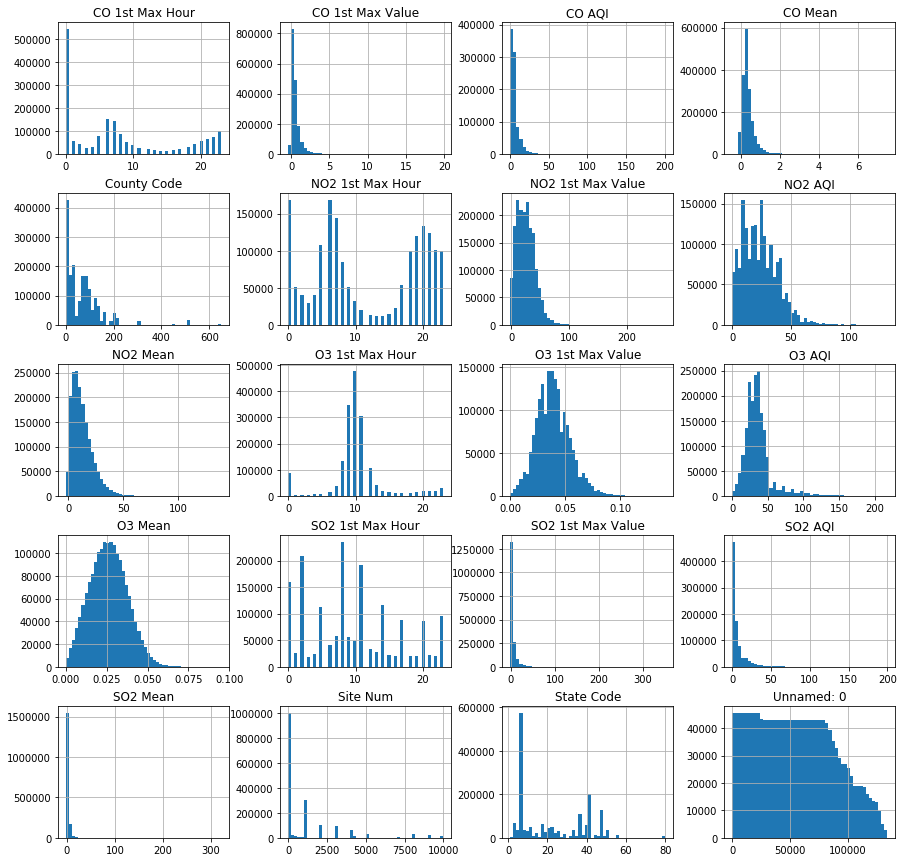

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
pollution.hist(bins=50, figsize=(15,15))
plt.show()


In [54]:
corr_matrix = pollution.corr()
print(corr_matrix)

                   Unnamed: 0  State Code  County Code  Site Num  NO2 Mean  \
Unnamed: 0           1.000000    0.900468     0.314373 -0.250897 -0.178741   
State Code           0.900468    1.000000     0.269284 -0.245268 -0.095675   
County Code          0.314373    0.269284     1.000000 -0.143841 -0.092672   
Site Num            -0.250897   -0.245268    -0.143841  1.000000  0.070851   
NO2 Mean            -0.178741   -0.095675    -0.092672  0.070851  1.000000   
NO2 1st Max Value   -0.157940   -0.069766    -0.071285  0.072546  0.904383   
NO2 1st Max Hour    -0.012439    0.017757    -0.001948 -0.014032  0.112540   
NO2 AQI             -0.159556   -0.070765    -0.072793  0.073608  0.905418   
O3 Mean              0.061252    0.043110     0.054692  0.043902 -0.432650   
O3 1st Max Value     0.016373    0.036221     0.048233  0.090318 -0.151998   
O3 1st Max Hour      0.000081    0.000902    -0.007364  0.002870  0.027303   
O3 AQI               0.017080    0.033527     0.040689  0.083351

In [55]:
pollution['O3 AQI'].value_counts()

31     98171
36     79056
25     74763
42     58818
19     52585
33     48600
32     48538
30     48452
29     47888
28     47302
35     46568
34     46202
27     45506
26     43318
37     42728
38     41633
47     40504
39     40014
24     39167
40     38192
44     37456
41     36342
23     36186
22     33176
21     31895
43     31238
20     29280
45     27138
14     25635
46     25606
       ...  
164      244
169      224
136      224
126      220
161      212
166      212
177      202
133      196
172      172
174      140
179      136
143      116
182       96
185       88
187       84
195       68
197       68
202       64
190       60
200       56
201       52
192       48
203       44
206       32
204       24
205       24
207       20
210        4
211        4
218        4
Name: O3 AQI, Length: 125, dtype: int64

In [56]:
corr_matrix["O3 AQI"].sort_values(ascending=False)

O3 AQI               1.000000
O3 1st Max Value     0.931867
O3 Mean              0.768771
Site Num             0.083351
SO2 AQI              0.051973
NO2 AQI              0.049027
NO2 1st Max Value    0.048743
O3 1st Max Hour      0.048395
SO2 1st Max Value    0.044307
County Code          0.040689
State Code           0.033527
Unnamed: 0           0.017080
SO2 Mean             0.015523
SO2 1st Max Hour     0.000883
CO 1st Max Hour     -0.078250
NO2 Mean            -0.082361
NO2 1st Max Hour    -0.086782
CO 1st Max Value    -0.120001
CO Mean             -0.129736
CO AQI              -0.130092
Name: O3 AQI, dtype: float64

In [57]:
# You might want to use the following package
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# Your code goes here for this section.
X_train = [];
y_train = [];
X_test = [];
y_test = [];

# NO2-ppb, O3-ppm, SO2 ppb, CO ppm,
pollution.drop(['NO2 Units','O3 Units', 'SO2 Units', 'CO Units', 'County', 'City', 'State'],axis=1)
pollution = pollution[np.isfinite(pollution['NO2 AQI'])]
pollution = pollution[np.isfinite(pollution['O3 AQI'])]
pollution = pollution[np.isfinite(pollution['SO2 AQI'])]
pollution = pollution[np.isfinite(pollution['CO AQI'])]


pollution['Date Local'] = pd.to_datetime(pollution['Date Local'])

pollution['Year'] = pollution['Date Local'].dt.year
pollution['Month'] = pollution['Date Local'].dt.month
pollution['Day'] = pollution['Date Local'].dt.day

X = pollution[["State","County", "City", 'Year', 'Month', 'Day', 
               'NO2 Mean', "NO2 1st Max Value", 'NO2 1st Max Hour',
               'O3 Mean', "O3 1st Max Value", 'O3 1st Max Hour',
               'SO2 Mean', "SO2 1st Max Value", 'SO2 1st Max Hour',
              'CO Mean', "CO 1st Max Value", 'CO 1st Max Hour']]

Y = pollution[['NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI']]
Y_NO2 = pollution[["NO2 AQI"]]
Y_O3 = pollution[["O3 AQI"]]
Y_SO2 = pollution[["SO2 AQI"]]
Y_CO = pollution[["CO AQI"]]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20, random_state=1)
X_train = X_train[:40000]
X_test = X_train[:20000]
Y_train = Y_train[:40000]
Y_test = Y_train[:20000]

print(len(X_train), "X_train +", len(X_test), "X_test")
print(len(Y_train), "Y_train_NO2 +", len(Y_test), "Y_test_NO2")

40000 X_train + 20000 X_test
40000 Y_train_NO2 + 20000 Y_test_NO2


In [58]:
Y_test

,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
1104361,28,21,0.0,9.0
1666938,1,25,0.0,1.0
724916,9,23,4.0,2.0
830759,48,67,14.0,13.0
1663846,14,31,1.0,3.0
263164,23,44,9.0,3.0
1159519,1,31,1.0,1.0
966604,8,22,11.0,5.0
1683228,9,50,0.0,2.0
1241093,36,23,0.0,8.0


In [59]:
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer


In [60]:
# suicide_num = suicide.drop(['country', 'sex', 'age','country-year', ' gdp_for_year ($) ','generation'], axis=1)
pollution_num = X_train.select_dtypes(include=[np.number])
pollution_num.head()

,Year,Month,Day,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,O3 Mean,O3 1st Max Value,O3 1st Max Hour,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,CO Mean,CO 1st Max Value,CO 1st Max Hour
1104361,2011,1,23,13.500000,30.0,18,0.008792,0.025,10,0.000000,0.0,0,0.458333,0.8,23
1666938,2015,6,21,0.841667,1.6,19,0.023556,0.027,9,0.037500,0.1,0,0.100000,0.1,0
724916,2007,6,3,6.625000,10.0,0,0.022000,0.027,15,1.666667,3.0,7,0.116667,0.2,0
830759,2008,4,19,22.250000,51.0,0,0.042583,0.065,9,4.041667,10.0,9,0.820833,1.1,3
1663846,2015,10,3,7.758333,15.6,1,0.023042,0.033,11,0.616667,1.9,9,0.208333,0.3,22


# One-Hot Encoding of Categorical Data

In [61]:
try:
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder # Scikit-Learn < 0.20

# cat_encoder = OneHotEncoder(sparse=False)
# pollution_cat_1hot = cat_encoder.fit_transform(pollution_cat)
# pollution_cat_1hot

In [62]:
# cat_encoder.categories_

## PIPELINE

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

In [64]:
try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer # Scikit-Learn < 0.20

In [65]:
# X_train
X_train.shape

(40000, 18)

In [106]:
# X_test
X_test.shape

array([[ 0.57477691, -1.6798038 ,  0.81886444, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.4317256 , -0.15647621,  0.59227698, ...,  0.        ,
         0.        ,  0.        ],
       [-0.28217178, -0.15647621, -1.44701021, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.13912047, -0.15647621, -0.65395408, ...,  0.        ,
         0.        ,  0.        ],
       [-1.78183199, -1.6798038 , -0.99383528, ...,  0.        ,
         0.        ,  0.        ],
       [-0.9248833 ,  1.06218586, -1.56030395, ...,  0.        ,
         0.        ,  0.        ]])

In [67]:
num_attribs = list(pollution_num)
cat_attribs = ['State', 'County', 'City']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(sparse=False), cat_attribs),
    ])

X_train = full_pipeline.fit_transform(X_train)
X_test = full_pipeline.fit_transform(X_test)

In [68]:
X_train

array([[ 0.57968423, -1.67489982,  0.82271505, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.43959038, -0.15300381,  0.59620517, ...,  0.        ,
         0.        ,  0.        ],
       [-0.28022192, -0.15300381, -1.44238381, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.14973116, -0.76176222,  0.02993045, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.79466077, -0.76176222,  0.36969528, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.22461384,  0.15137539,  0.59620517, ...,  0.        ,
         0.        ,  0.        ]])

In [88]:
X_train.shape
Test = X_train[10]

In [70]:
X_test.shape

(20000, 339)

In [22]:
type(Y_train)

pandas.core.frame.DataFrame

- - -
## 3. IMPLEMENTATION OF GRADIENT DESCENT 

In [80]:
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error

# NO2
# SGD
SGD_NO2= SGDClassifier(loss="hinge", penalty="l2", max_iter=10)

SGD_NO2.fit(X_train, Y_train['NO2 AQI']) 
Y_predict_SGD = SGD_NO2.predict(X_test)
mse = mean_squared_error(Y_test["NO2 AQI"], Y_predict_SGD)
mySGDModel_rmse = np.sqrt(mse)
# print("SGDModel", mySGDModel_rmse)

# K Nearest
Knear_NO2 = KNeighborsRegressor(n_neighbors=2)

Knear_NO2.fit(X_train, Y_train['NO2 AQI']) 
Y_predict_Knear = Knear_NO2.predict(X_test)
mse = mean_squared_error(Y_test["NO2 AQI"], Y_predict_Knear)
myKnear_rmse = np.sqrt(mse)
# print("Knear", myKnear_rmse)

# Ensemble
Y_predict_avg = (Y_predict_SGD + Y_predict_Knear)/2
mse = mean_squared_error(Y_test["O3 AQI"], Y_predict_avg)
ensemble_rmse = np.sqrt(mse)
print("Ensemble", ensemble_rmse)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Ensemble 25.922632184540984


In [81]:
# O3
# SGD
SGD_O3= SGDClassifier(loss="hinge", penalty="l2", max_iter=10)
Knear_O3 = KNeighborsRegressor(n_neighbors=2)

SGD_O3.fit(X_train, Y_train['O3 AQI']) 
Y_predict_SGD = SGD_O3.predict(X_test)
mse = mean_squared_error(Y_test["O3 AQI"], Y_predict_SGD)
mySGDModel_rmse = np.sqrt(mse)
# print("SGDModel", mySGDModel_rmse)

# K Nearest
Knear_O3 = KNeighborsRegressor(n_neighbors=2)

Knear_O3.fit(X_train, Y_train['O3 AQI']) 
Y_predict_Knear = Knear_O3.predict(X_test)
mse = mean_squared_error(Y_test["O3 AQI"], Y_predict_Knear)
myKnear_rmse = np.sqrt(mse)
# print("Knear", myKnear_rmse)

# Ensemble
Y_predict_avg = (Y_predict_SGD + Y_predict_Knear)/2
mse = mean_squared_error(Y_test["O3 AQI"], Y_predict_avg)
_rmse = np.sqrt(mse)
print("Ensemble", myKnear_rmse)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Ensemble 4.931609777750061


In [85]:
# SO2
SGD_SO2= SGDClassifier(loss="hinge", penalty="l2", max_iter=10)
Knear_SO2 = KNeighborsRegressor(n_neighbors=2)


SGD_SO2.fit(X_train, Y_train['SO2 AQI']) 
Y_predict_SGD = SGD_SO2.predict(X_test)
mse = mean_squared_error(Y_test["SO2 AQI"], Y_predict_SGD)
mySGDModel_rmse = np.sqrt(mse)
# print("SGDModel", mySGDModel_rmse)

# K Nearest
Knear_SO2 = KNeighborsRegressor(n_neighbors=2)

Knear_SO2.fit(X_train, Y_train['SO2 AQI']) 
Y_predict_Knear = Knear_SO2.predict(X_test)
mse = mean_squared_error(Y_test["SO2 AQI"], Y_predict_Knear)
myKnear_rmse = np.sqrt(mse)
# print("Knear", myKnear_rmse)

#Ensemble
Y_predict_avg = (Y_predict_SGD + Y_predict_Knear)/2
mse = mean_squared_error(Y_test["SO2 AQI"], Y_predict_avg)
ensemble_rmse = np.sqrt(mse)
print("Ensemble", ensemble_rmse)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Ensemble 4.884051212876458


In [82]:
# CO
SGD_CO= SGDClassifier(loss="hinge", penalty="l2", max_iter=10)
Knear_CO = KNeighborsRegressor(n_neighbors=2)

SGD_CO.fit(X_train, Y_train['CO AQI']) 
Y_predict_SGD = SGD_CO.predict(X_test)
mse = mean_squared_error(Y_test["CO AQI"], Y_predict_SGD)
mySGDModel_rmse = np.sqrt(mse)
# print("SGDModel", mySGDModel_rmse)

# K Nearest
Knear_CO = KNeighborsRegressor(n_neighbors=2)

Knear_CO.fit(X_train, Y_train['CO AQI']) 
Y_predict_Knear = Knear_CO.predict(X_test)
mse = mean_squared_error(Y_test["CO AQI"], Y_predict_Knear)
myKnear_rmse = np.sqrt(mse)
# print("Knear", myKnear_rmse)

# Ensemble
Y_predict_avg = (Y_predict_SGD + Y_predict_Knear)/2
mse = mean_squared_error(Y_test["CO AQI"], Y_predict_avg)
ensemble_rmse = np.sqrt(mse)
print("Ensemble", ensemble_rmse)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Ensemble 2.140915400010005


# PREDICT

In [112]:
X = pollution[["State","County", "City", 'Year', 'Month', 'Day', 
               'NO2 Mean', "NO2 1st Max Value", 'NO2 1st Max Hour',
               'O3 Mean', "O3 1st Max Value", 'O3 1st Max Hour',
               'SO2 Mean', "SO2 1st Max Value", 'SO2 1st Max Hour',
              'CO Mean', "CO 1st Max Value", 'CO 1st Max Hour']]





Predict_Sample = [{'State':"Arizona",'County':"Maricopa", 'City':"Phoenix", 'Year':'2001', 'Month':'07', 'Day':'02', 
               'NO2 Mean':'17', 'NO2 1st Max Value':"48", 'NO2 1st Max Hour':'17',
               'O3 Mean':'.02', 'O3 1st Max Value':".04",'O3 1st Max Hour': '11', 
               'SO2 Mean':'5.2', 'SO2 1st Max Value':"9", 'SO2 1st Max Hour':'20',
              'CO Mean':'.87', 'CO 1st Max Value':"2.2", 'CO 1st Max Hour':'24'}]


Predict_Sample = pd.DataFrame(Predict_Sample)  
Predict_Sample = Predict_Sample.to_numpy()

print(type(Test))
# Test = X_train[0]
Test = Test.reshape(1, -1)
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(sparse=False), cat_attribs),
    ])
Predict_Sample = full_pipeline.fit_transform(Predict_Sample)
print(Predict_Sample)


# NO2 Prediction
Y_predict_SGD = SGD_NO2.predict(Test)
Y_predict_Knear = Knear_NO2.predict(Test)
ensemble_predict = (Y_predict_SGD + Y_predict_Knear)/2
print("NO2 AQI: ", ensemble_predict)

# O3 Prediction
Y_predict_SGD = SGD_O3.predict(Test)
Y_predict_Knear = Knear_O3.predict(Test)
ensemble_predict = (Y_predict_SGD + Y_predict_Knear)/2
print("O3 AQI: ", ensemble_predict)

# SO2 Prediction 
Y_predict_SGD = SGD_SO2.predict(Test)
Y_predict_Knear = Knear_SO2.predict(Test)
ensemble_predict = (Y_predict_SGD + Y_predict_Knear)/2
print("SO2 AQI: ",ensemble_predict)

# CO Prediction
Y_predict_SGD = SGD_CO.predict(Test)
Y_predict_Knear = Knear_CO.predict(Test)
ensemble_predict = (Y_predict_SGD + Y_predict_Knear)/2
print("CO AQI:", ensemble_predict)

<class 'numpy.ndarray'>


ValueError: Specifying the columns using strings is only supported for pandas DataFrames